<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه‌ای بر شبکه‌های عصبی و چارچوب Keras (کراس)</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">


In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from dataset import load_hoda

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [2]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [3]:
# Preprocess input data for Keras. 
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
نرمال سازی مقادیر به مقدار بین 0 و 1 
</div>

In [4]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموش مدل با داده‌های آموزشی</div>


In [8]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 22s 47ms/step - loss: 2.2487 - accuracy: 0.1298 - val_loss: 2.0439 - val_accuracy: 0.3000
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 1.9972 - accuracy: 0.3908 - val_loss: 1.8559 - val_accuracy: 0.5300
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 1.8046 - accuracy: 0.5565 - val_loss: 1.6859 - val_accuracy: 0.6700
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 1.6233 - accuracy: 0.6947 - val_loss: 1.5330 - val_accuracy: 0.7550
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 1.4898 - accuracy: 0.7066 - val_loss: 1.3849 - val_accuracy: 0.7800
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3309 - accuracy: 0.7593 - val_loss: 1.2534 - val_accuracy: 0.7850
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 1.1930 - accuracy: 0.7858 - val_loss: 1.1335 - val_accuracy: 0.7950
Epoch 8/100

Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.9326 - val_loss: 0.3183 - val_accuracy: 0.9050
Epoch 60/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1849 - accuracy: 0.9472 - val_loss: 0.3181 - val_accuracy: 0.9050
Epoch 61/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2084 - accuracy: 0.9326 - val_loss: 0.3191 - val_accuracy: 0.8950
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2043 - accuracy: 0.9280 - val_loss: 0.3169 - val_accuracy: 0.9000
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1956 - accuracy: 0.9289 - val_loss: 0.3169 - val_accuracy: 0.9000
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1964 - accuracy: 0.9282 - val_loss: 0.3178 - val_accuracy: 0.9000
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1954 - accuracy: 0.9332 - val_loss: 0.3181 - val_accuracy: 0.9000
Epoch 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

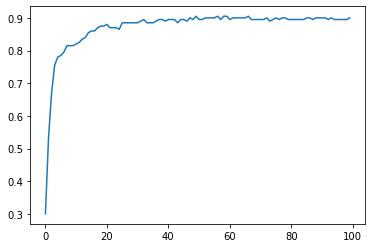

In [10]:
plt.plot(history.history['val_accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ارزیابی مدل روی داده های آزمون</div>

In [11]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.9200

Testing loss: 0.27, acc: 0.92%


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی داده‌های آموزشی</div>


In [12]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

C:\ProgramData\Miniconda3\envs\tensorflow_25\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predicted:
[7 2 3 9 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 6 5
 1 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 2 8 8 2 9 8 8 6 6 6 6 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 6 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 5 4 4 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 3 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 0 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


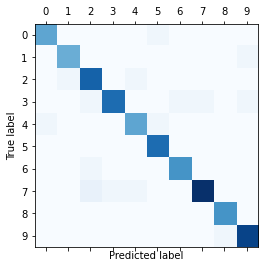

In [17]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");